# Visualisation des données 

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Répertoire du fichier des données 
PROCESSED_DIR = '../data/processed/'

# Table principale
ALL_DATA_FILE= 'all_data.csv'


In [5]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))
# le .dt est une fonction qui permet 

In [6]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
day                       object
dtype: object

In [7]:
epidemie_df['Country/Region'].value_counts()

Mainland China    1389
US                 595
Australia          185
Canada             121
South Korea         45
                  ... 
Togo                 1
 Azerbaijan          1
Bhutan               1
North Ireland        1
Costa Rica           1
Name: Country/Region, Length: 102, dtype: int64

## Epidemie en France

In [8]:
import seaborn as sns

sns.set()

In [9]:
%matplotlib inline

In [10]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
124,NaN,France,2020-01-24 17:00:00,2.0,NaN,NaN,47.0,2.0,01-24-2020.csv,2020-01-24
165,NaN,France,2020-01-25 17:00:00,3.0,NaN,NaN,47.0,2.0,01-25-2020.csv,2020-01-25
211,NaN,France,2020-01-26 16:00:00,3.0,NaN,NaN,47.0,2.0,01-26-2020.csv,2020-01-26
258,NaN,France,2020-01-27 23:59:00,3.0,NaN,NaN,47.0,2.0,01-27-2020.csv,2020-01-27
309,NaN,France,2020-01-28 23:00:00,4.0,NaN,NaN,47.0,2.0,01-28-2020.csv,2020-01-28


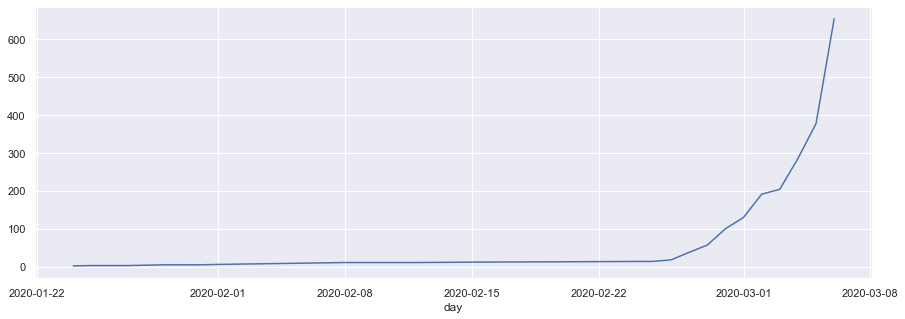

In [11]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed'].plot(figsize=(15,5)); 
# En mettant la date en index il va le mettre en abcsisse
# En mettant le ; à la fin il enlève la ligne au dessus du graph 

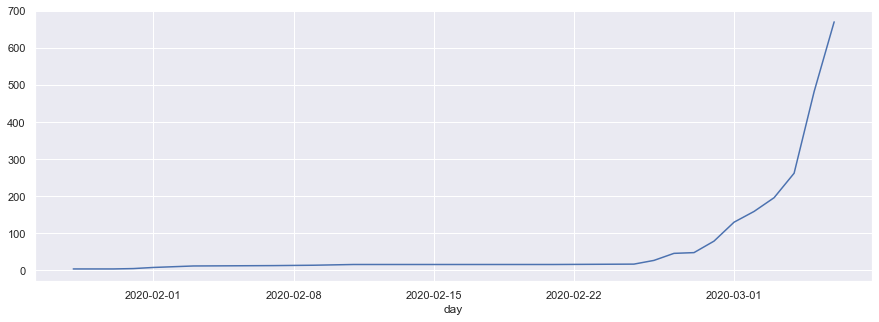

In [12]:
epidemie_df[epidemie_df['Country/Region'] == 'Germany'].set_index('day')['Confirmed'].plot(figsize=(15,5)); 

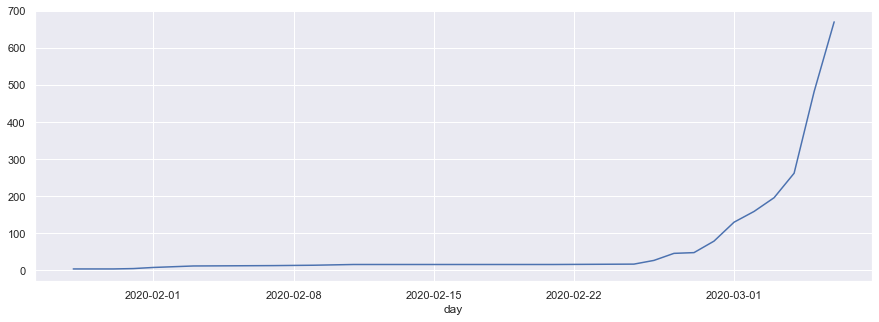

In [13]:
epidemie_df[epidemie_df['Country/Region'] == 'Germany'].set_index('day')['Confirmed'].plot(figsize=(15,5)); 

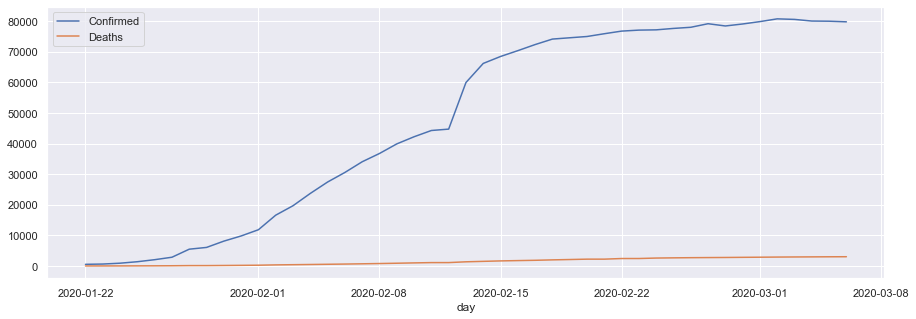

In [14]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day')
 .agg({'Confirmed': 'sum', 'Deaths': 'sum'})
).plot(figsize=(15,5));

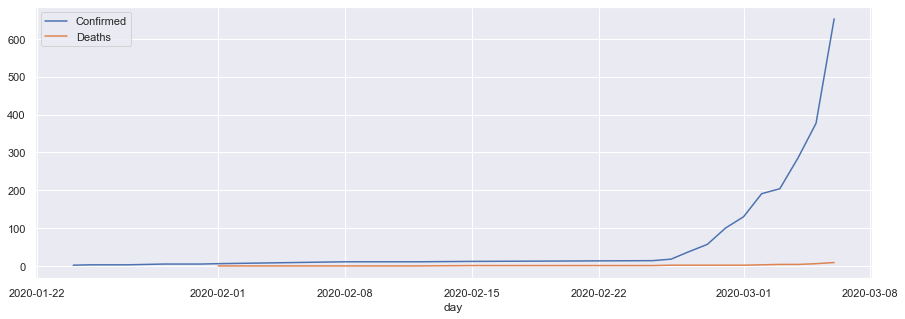

In [18]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed','Deaths'] ]
 .plot(figsize=(15,5)));

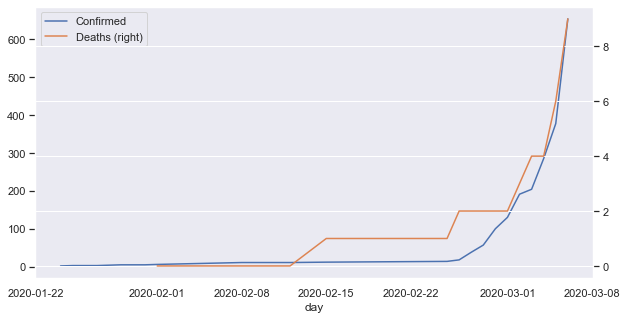

In [19]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Deaths'] ]
 .plot(secondary_y=['Deaths'], figsize=(10, 5))
);

In [20]:
(china_df = epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .groupby('day')
 .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}))

SyntaxError: invalid syntax (<ipython-input-20-f7d76a189156>, line 1)

In [22]:
china_df.head()

NameError: name 'china_df' is not defined

In [23]:
china_df.plot(secondary_y=['Deaths'], figsize=(15,5));

NameError: name 'china_df' is not defined

In [24]:
(china_df.assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])
 [['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12,5))
);

NameError: name 'china_df' is not defined

*Python: graphiques statiques ( matplotlib, seaborn )    
Graphiques dynamiques : (bokeh, dash plotly, altair )*

In [25]:
EUROPE = ['France', 'Germany', 'UK', 'Spain']

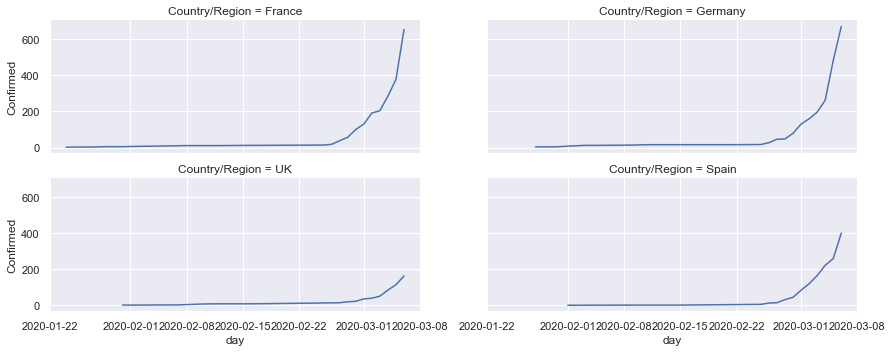

In [26]:
g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                 col='Country/Region', col_wrap=2, height=2.5, aspect=2.5)
g = g.map(plt.plot, 'day', 'Confirmed');

In [27]:
# import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.offline as py


In [28]:
france_df = epidemie_df[epidemie_df['Country/Region'] == 'France']

In [49]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Confirmés/France'
                  ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                   name='Confirmés/Allemagne'
                  )
       ]

layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)